In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.tail()
train.head()
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test.shape

(418, 11)

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
# df.drop_duplicates()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [16]:
train_num = train[['Age','SibSp','Parch','Fare']]
train_cat = train[['Survived','Pclass','Sex','Embarked','Cabin','Ticket']]

In [17]:
print(train_num.shape)
train_cat.shape

(891, 4)


(891, 6)

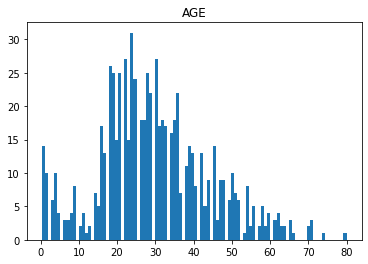

In [18]:
plt.hist(train_num['Age'],bins =100)
plt.title('AGE')
plt.show()

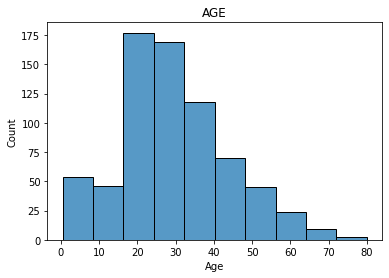

In [19]:
sns.histplot(train_num['Age'],bins = 10)
plt.title('AGE')
plt.show()

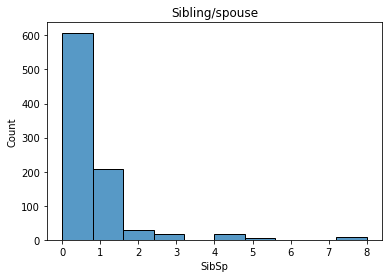

In [20]:
sns.histplot(train_num['SibSp'],bins = 10)
plt.title('Sibling/spouse')
plt.show()

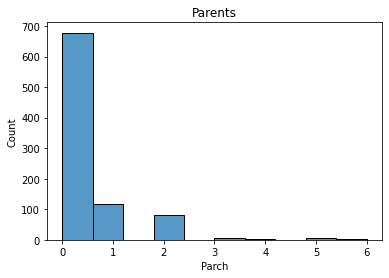

In [21]:
sns.histplot(train_num['Parch'],bins = 10)
plt.title('Parents')
plt.show()

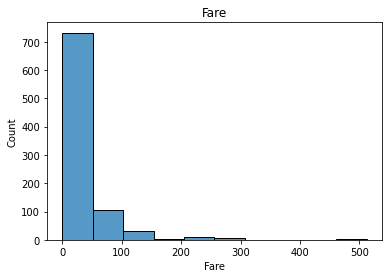

In [22]:
sns.histplot(train_num['Fare'],bins = 10)
plt.title('Fare')
plt.show()

In [23]:
train_cat['Survived'].unique()

array([0, 1], dtype=int64)

In [24]:
train_cat['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

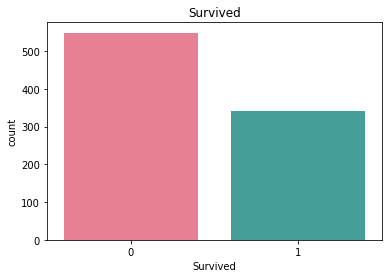

In [25]:
sns.countplot(train_cat['Survived'],data = train_cat,palette = 'husl')
plt.title('Survived')
# plt.xticks(rotation= 90)
plt.show()

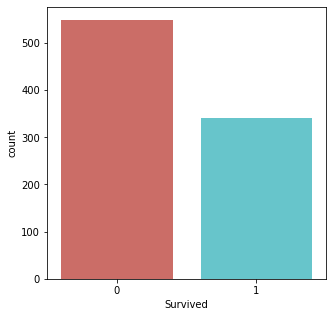

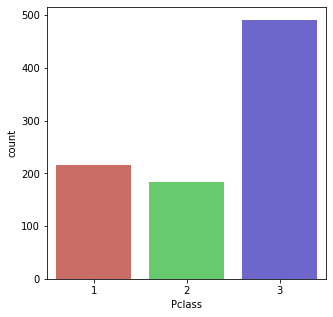

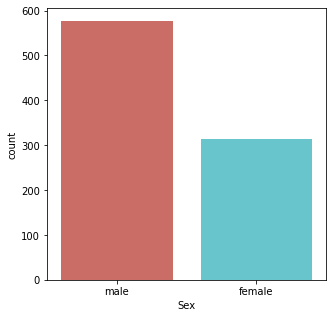

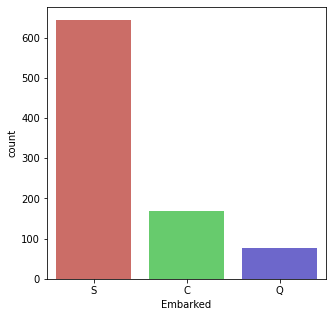

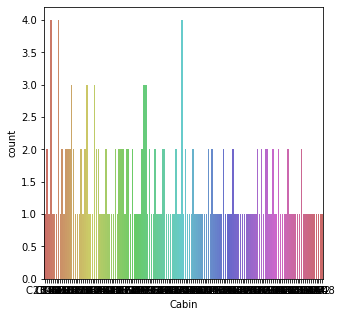

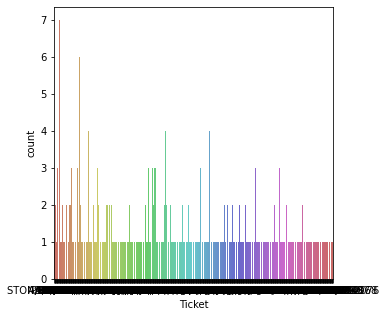

In [26]:
for i in train_cat.columns:
    plt.figure(figsize =(5,5))
    sns.countplot(train_cat[i],data = train_cat,palette = 'hls')
    plt.show()

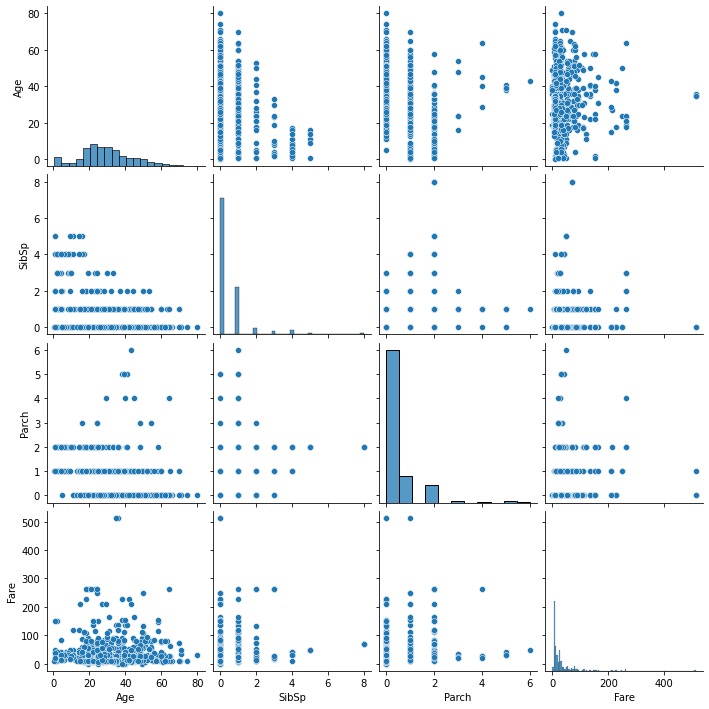

In [27]:
sns.pairplot(train_num)


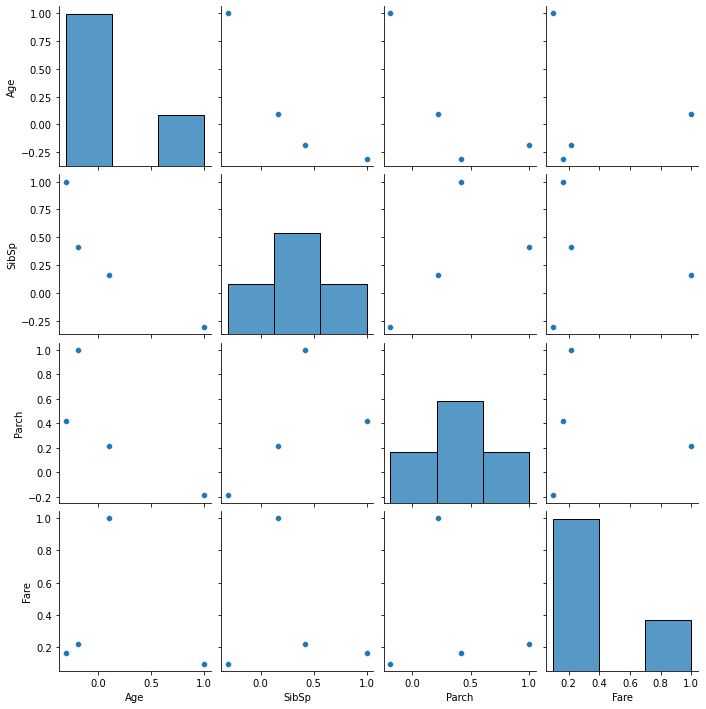

In [28]:
b = train_num.corr()
sns.pairplot(b)

In [29]:
b

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

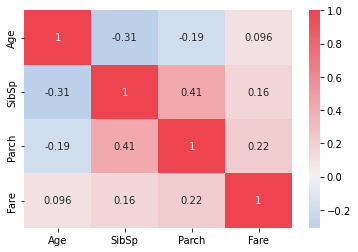

In [30]:
cmap = sns.diverging_palette(250,10,s=80,l=55,n=9,as_cmap = True)
sns.heatmap(b,annot = True,cmap = cmap,center =0)

<AxesSubplot:>

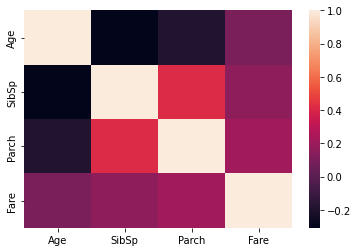

In [31]:
sns.heatmap(b)

In [32]:
pd.pivot_table(train,index = 'Survived',values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [33]:
survived=train_cat['Survived'].value_counts(normalize = True)

In [34]:
survived = pd.DataFrame(survived)
survived

,Survived
0,0.616162
1,0.383838


In [35]:
s=train_cat['Survived'].value_counts(normalize=True)
survived = pd.DataFrame(s)
survived.index


Int64Index([0, 1], dtype='int64')

In [36]:
#reset index
survived = survived.reset_index()
survived

,index,Survived
0,0,0.616162
1,1,0.383838


In [37]:
#renaming the columns
survived = survived.rename(columns = {'index':'Survived','Survived':'% of Survived'})
survived['% of Survived'] = survived['% of Survived']*100
survived

,Survived,% of Survived
0,0,61.616162
1,1,38.383838


In [38]:
survived['% of Survived'] = np.round(survived['% of Survived'])
survived

,Survived,% of Survived
0,0,62.0
1,1,38.0


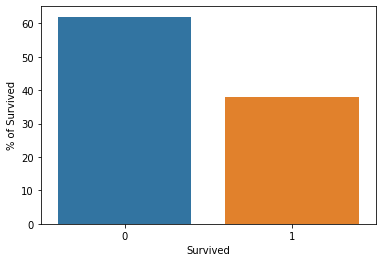

In [39]:
sns.barplot(x = "Survived", y ="% of Survived",data= survived)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='% of Survived'>

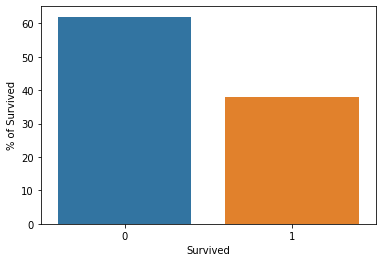

In [40]:
x = survived['Survived']
y = survived['% of Survived']
sns.barplot(x,y)

<AxesSubplot:xlabel='Class', ylabel='% of passengers'>

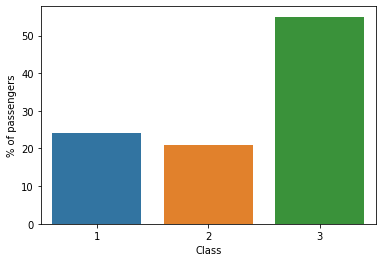

In [41]:
Pclass = train_cat['Pclass'].value_counts(normalize =True)
Pclass=pd.DataFrame(Pclass)
Pclass = Pclass.reset_index()
Pclass = Pclass.rename(columns = {
    'index':'Class',
    'Pclass': '% of passengers'
})
Pclass = Pclass.sort_values(by = 'Class')
Pclass['% of passengers'] = Pclass["% of passengers"]*100
Pclass['% of passengers'] = np.round(Pclass['% of passengers'])
Pclass
x = Pclass['Class']
y = Pclass['% of passengers']
sns.barplot(x,y)


<AxesSubplot:xlabel='Sex', ylabel='% of Male/Female'>

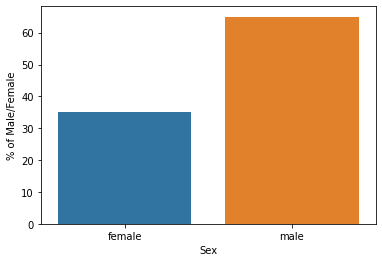

In [42]:
Pclass = train_cat['Sex'].value_counts(normalize =True)
Pclass=pd.DataFrame(Pclass)
Pclass = Pclass.reset_index()
Pclass = Pclass.rename(columns = {
    'index':'Sex',
    'Sex': '% of Male/Female'
})
Pclass = Pclass.sort_values(by = 'Sex')
Pclass['% of Male/Female'] = Pclass['% of Male/Female']*100
Pclass['% of Male/Female'] = np.round(Pclass['% of Male/Female'])
Pclass
x = Pclass['Sex']
y = Pclass['% of Male/Female']
sns.barplot(x,y)

In [43]:
Pclass


,Sex,% of Male/Female
1,female,35.0
0,male,65.0


In [44]:
#Ticket vs % of passengers

<AxesSubplot:xlabel='Ticket', ylabel='% of passengers'>

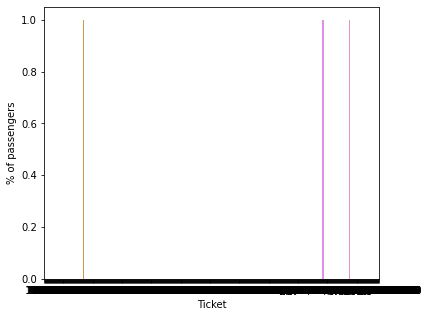

In [45]:
Ticket = train_cat['Ticket'].value_counts(normalize =True)
Ticket=pd.DataFrame(Ticket)
Ticket = Ticket.reset_index()
Ticket = Ticket.rename(columns = {
    'index':'Ticket',
    'Ticket': '% of passengers'
})
Ticket = Ticket.sort_values(by = 'Ticket')
Ticket['% of passengers'] = Ticket["% of passengers"]*100
Ticket['% of passengers'] = np.round(Ticket['% of passengers'])
plt.figure(figsize = (6,5))
x = Ticket['Ticket']
y = Ticket['% of passengers']

sns.barplot(x,y)


In [46]:
#reset index
Ticket

,Ticket,% of passengers
36,110152,0.0
38,110413,0.0
62,110465,0.0
600,110564,0.0
562,110813,0.0
...,...,...
15,W./C. 6608,0.0
634,W./C. 6609,0.0
509,W.E.P. 5734,0.0
444,W/C 14208,0.0


In [47]:
train_x = train[['Survived','Fare','Age','Sex','Pclass']]
test_x =test[['Pclass','Sex','Age','Fare']]

In [48]:
train_x.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [49]:
train_x['Age'] = train_x.groupby('Sex')['Age'].transform(lambda x :x.fillna(x.mean()))
train_x['Age'].isnull().sum()
test_x['Age'] = train_x.groupby('Sex')['Age'].transform(lambda x :x.fillna(x.mean()))
test_x['Age'].isnull().sum()

0

In [50]:
train_x['Fare'].fillna(train_x['Fare'].mean(),inplace = True)
test_x['Fare'].fillna(test_x['Fare'].mean(),inplace = True)

# print(train_x['Fare'].mean())

In [51]:
# train_x.isnull().sum()
test_x.isnull

<bound method DataFrame.isnull of      Pclass     Sex        Age      Fare
0         3    male  22.000000    7.8292
1         3  female  38.000000    7.0000
2         2    male  26.000000    9.6875
3         3    male  35.000000    8.6625
4         3  female  35.000000   12.2875
..      ...     ...        ...       ...
413       3    male  30.726645    8.0500
414       1  female  44.000000  108.9000
415       3    male  27.915709    7.2500
416       3    male  34.000000    8.0500
417       3    male  18.000000   22.3583

[418 rows x 4 columns]>

In [52]:
#ANALYSIS IS DONE NOW PREPROCESSING

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
#for changeing categorical values to numerical
le = LabelEncoder()

In [55]:
train_x['Sex'] = le.fit_transform(train_x.Sex)
# print(train_x)
test_x['Sex'] = le.fit_transform(test_x.Sex)
test_x

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.8292
1,3,0,38.000000,7.0000
2,2,1,26.000000,9.6875
3,3,1,35.000000,8.6625
4,3,0,35.000000,12.2875
...,...,...,...,...
413,3,1,30.726645,8.0500
414,1,0,44.000000,108.9000
415,3,1,27.915709,7.2500
416,3,1,34.000000,8.0500


In [56]:
X = train_x[['Pclass','Sex','Age','Fare']]
y = train_x['Survived']


In [57]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [58]:
y.isnull().sum()

0

In [59]:
X.shape

(891, 4)

In [60]:
y.shape

(891,)

In [71]:
gender_sub_data = pd.read_csv('gender_submission.csv')
gender_sub_data.head()
y_test = gender_sub_data['Survived']

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.model_selection import train_test_split
y_train = train_x['Survived']

In [64]:
sc = StandardScaler()
X = sc.fit_transform(X)
test_x = sc.fit_transform(test_x)


In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y_train)
y_pred = model.predict(test_x)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [68]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       266
           1       0.66      0.64      0.65       152

    accuracy                           0.75       418
   macro avg       0.73      0.73      0.73       418
weighted avg       0.75      0.75      0.75       418



In [79]:
testing_Acc = model.score(test_x,y_test)
print('Testing Acc:',testing_Acc*100)
training_Acc= model.score(X,y)
print('training Acc:',training_Acc*100)

Testing Acc: 75.11961722488039
training Acc: 97.97979797979798


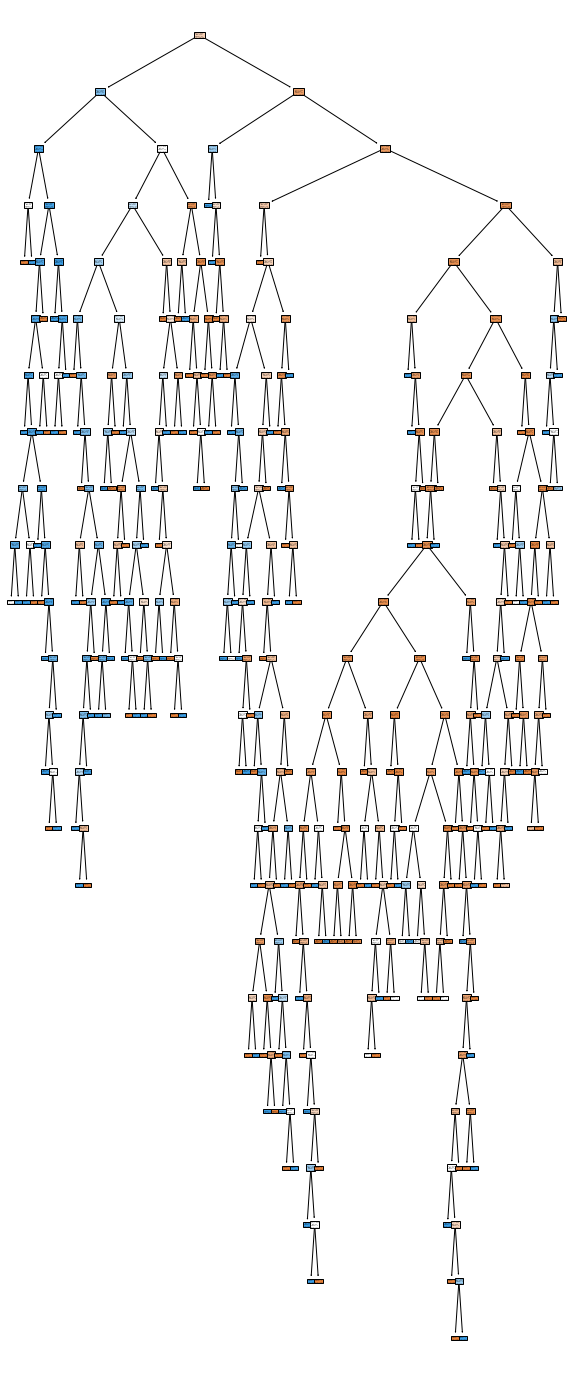

In [82]:
from sklearn import tree
plt.figure(figsize=(10,25))
tree.plot_tree(model,filled = True)
plt.show()

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X,y)

LogisticRegression(random_state=0)

In [92]:
y_pred = classifier.predict(test_x)
print(y_pred)
print('trainning Acc :',classifier.score(X,y))
print('testing Acc:',classifier.score(test_x,y_test))
#since testing acc > training acc this model cannot be chosen for the data

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 0 0 1 0 0 0]
trainning Acc : 0.7991021324354658
testing Acc: 0.9090909090909091


In [91]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier1.fit(X,y)
y_pred_forest = classifier1.predict(test_x)
print('training acc:',classifier1.score(X,y))
print('testing acc:',classifier1.score(test_x,y_test))


training acc: 0.9607182940516273
testing acc: 0.7918660287081339


In [ ]:
# -----------------------------------completed the project------------------------------------------------------------------